In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

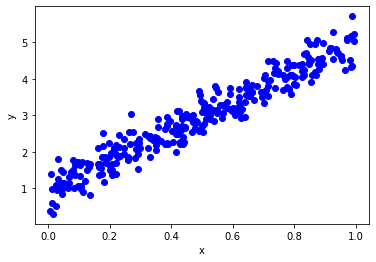

In [2]:
####$%ˆ#@ Vi Du voi du lieu random
np.random.seed(2)
X = np.random.rand(300,1)
y = 4*X+1+0.3*np.random.randn(300,1)# Them nhieu
# the hien qua bieu do
plt.plot(X,y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [3]:
#$@ Chia Du Lieu Dao tao - kiem thu
X_train, X_test, y_train, y_test = train_test_split(X,y)

print(X_train.shape)
print(X_test.shape)
print(X_train.shape)
print(X_test.shape)

(225, 1)
(75, 1)
(225, 1)
(75, 1)


In [4]:
# su dung model Linear Regression tu thu vien Sklearn
model = LinearRegression()
# Thuc hien train du lieu tren tap train
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# thuc hien du doan tren tap test
y_hat = model.predict(X_test)
# hien thi MSE cua du doan so voi label (Tinh Loss)
mean_squared_error(y_test, y_hat)

0.0912889743008689

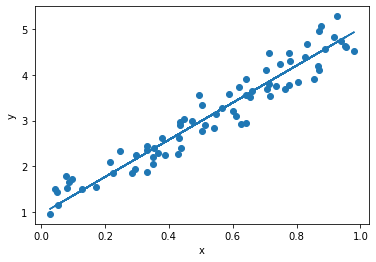

In [6]:
# Ve do thi du lieu cham xanh va duong du doan
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
#in w hoc dc w1,w0
print(model.coef_, model.intercept_)


[[4.05197002]] [0.95850025]


In [41]:
class GDLinearRegression:
    # khoi tao learning rate va khoi tao step de update  w
    def __init__(self, lr,step):
        self.lr = lr
        self.step = step
        
    ## Train the model voi dau vao la tap train data X cung nhan Y
    ##X la ma tran MxN trong do MxN trong do  M la so luong diem du lieu co N chieu
    ## Truong hop du lieu 1 chieu thi X la vector cot Mx1
    ## Lay ra so luong diem train_size va so chieu du lieu n_features
    
    def fit(self, X, y):
        self.n_features = X.shape[1] if len(X.shape)> 1 else 1
        train_size = len(X) # so luong sample
        
        # chuan hoa lai dinh dang du lieu 
        X = X.reshape(-1, self.n_features)#in ra so phan tu trong row dua vao n feature
        y = y.reshape([-1,1])
        
        # ta muon thuc hien du doan  y = X.T*W + bias, ta dua bias vao w(W|bias) va 1 cot toan 1 vao X(X|one)
        #luc do viec tinh toan thuan tien hon y = (X|one).T*(W|bias)
        one = np.ones([train_size, 1])
        X = np.concatenate([X,one], 1)
        
        #Tao weight chinh la tham so ta se optimize trong qua trinh train
        self.weight = np.zeros([self.n_features+1,1])
        print('x shape:',X.shape,'-y shape:', y.shape,'-weight shape:', self.weight.shape,'train_size:',train_size)
        
        # mang luu lai toan bo gia tri loss trong qua trinh train
        self.train_loss = []
        
        # train
        for i in range(self.step):
            
            loss = np.sum((y - np.dot(X, self.weight)) ** 2)
            delta = np.dot(X.T, ( np.dot(X, self.weight) - y))
            
            # update weight
            self.weight = self.weight - (self.lr/train_size) * delta
            
            # tinh trung binh loss
            loss = loss/train_size
            self.train_loss.append(loss.item())
            
        
          # Thuc hien du doan   
    def predict(self, X):
        # chuan hoa format du lieu nhu ta da lam trong luc train
        X = X.reshape(-1, self.n_features)

        # them cot one nhu ta da lam trong luc train
        one = np.ones([len(X), 1])
        X = np.concatenate([X, one],1)

        # Thuc hien du doan, don gian la nhan ma tran
        y_hat = np.dot(X, self.weight)

        return y_hat

    def print_weight(self):
            # In weight da hoc duoc
        print(self.weight)

    def get_train_loss(self):
        # tra ve train loss da luu trong qua trinh train
        return self.train_loss
    

In [42]:
model = GDLinearRegression(0.1, 1000)
model.fit(X_test, y_test)

x shape: (75, 2) -y shape: (75, 1) -weight shape: (2, 1) train_size: 75


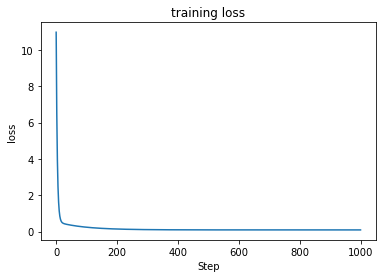

last loss:  0.08892961981309458


In [43]:
train_loss = model.get_train_loss()

plt.plot(range(len(train_loss)), train_loss)
plt.title("training loss")
plt.xlabel("Step")
plt.ylabel("loss")
plt.show()
print("last loss: ", train_loss[-1])

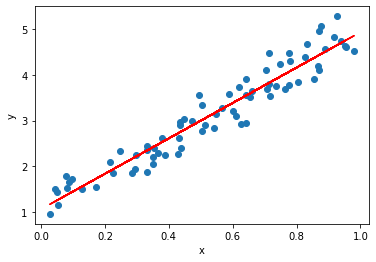

In [44]:
y_hat = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat, 'r')
plt.xlabel('x')
plt.ylabel('y')
# plt.title('y=-3x+5')
plt.show()

In [40]:
# kiem tra weight dc hoc kha gan voi y =4x +1
model.print_weight()

[[3.86268772]
 [1.06636389]]
